# processing an audio (inspired from rc circuit)
### hi i am Nanjundaradhya h y 

## i am planning to build an filter algorithm for audio 

first my aim is to construct a function which will take three inputs namely input voltage , time , voltage of capacitor at Tnot , the return value will be output voltage i.e voltage in the capacitor

wait if you are not getting what is this i want explain some things 
#first this is not any well known algorithm (even may be idk) and i am not competing with fft and other proffessional algorithms my motive is just my curiosity about electronics
#second this is my own experiment so it need not to be a efficient one but i will try !

i want to share some photos on explaining this part graphically

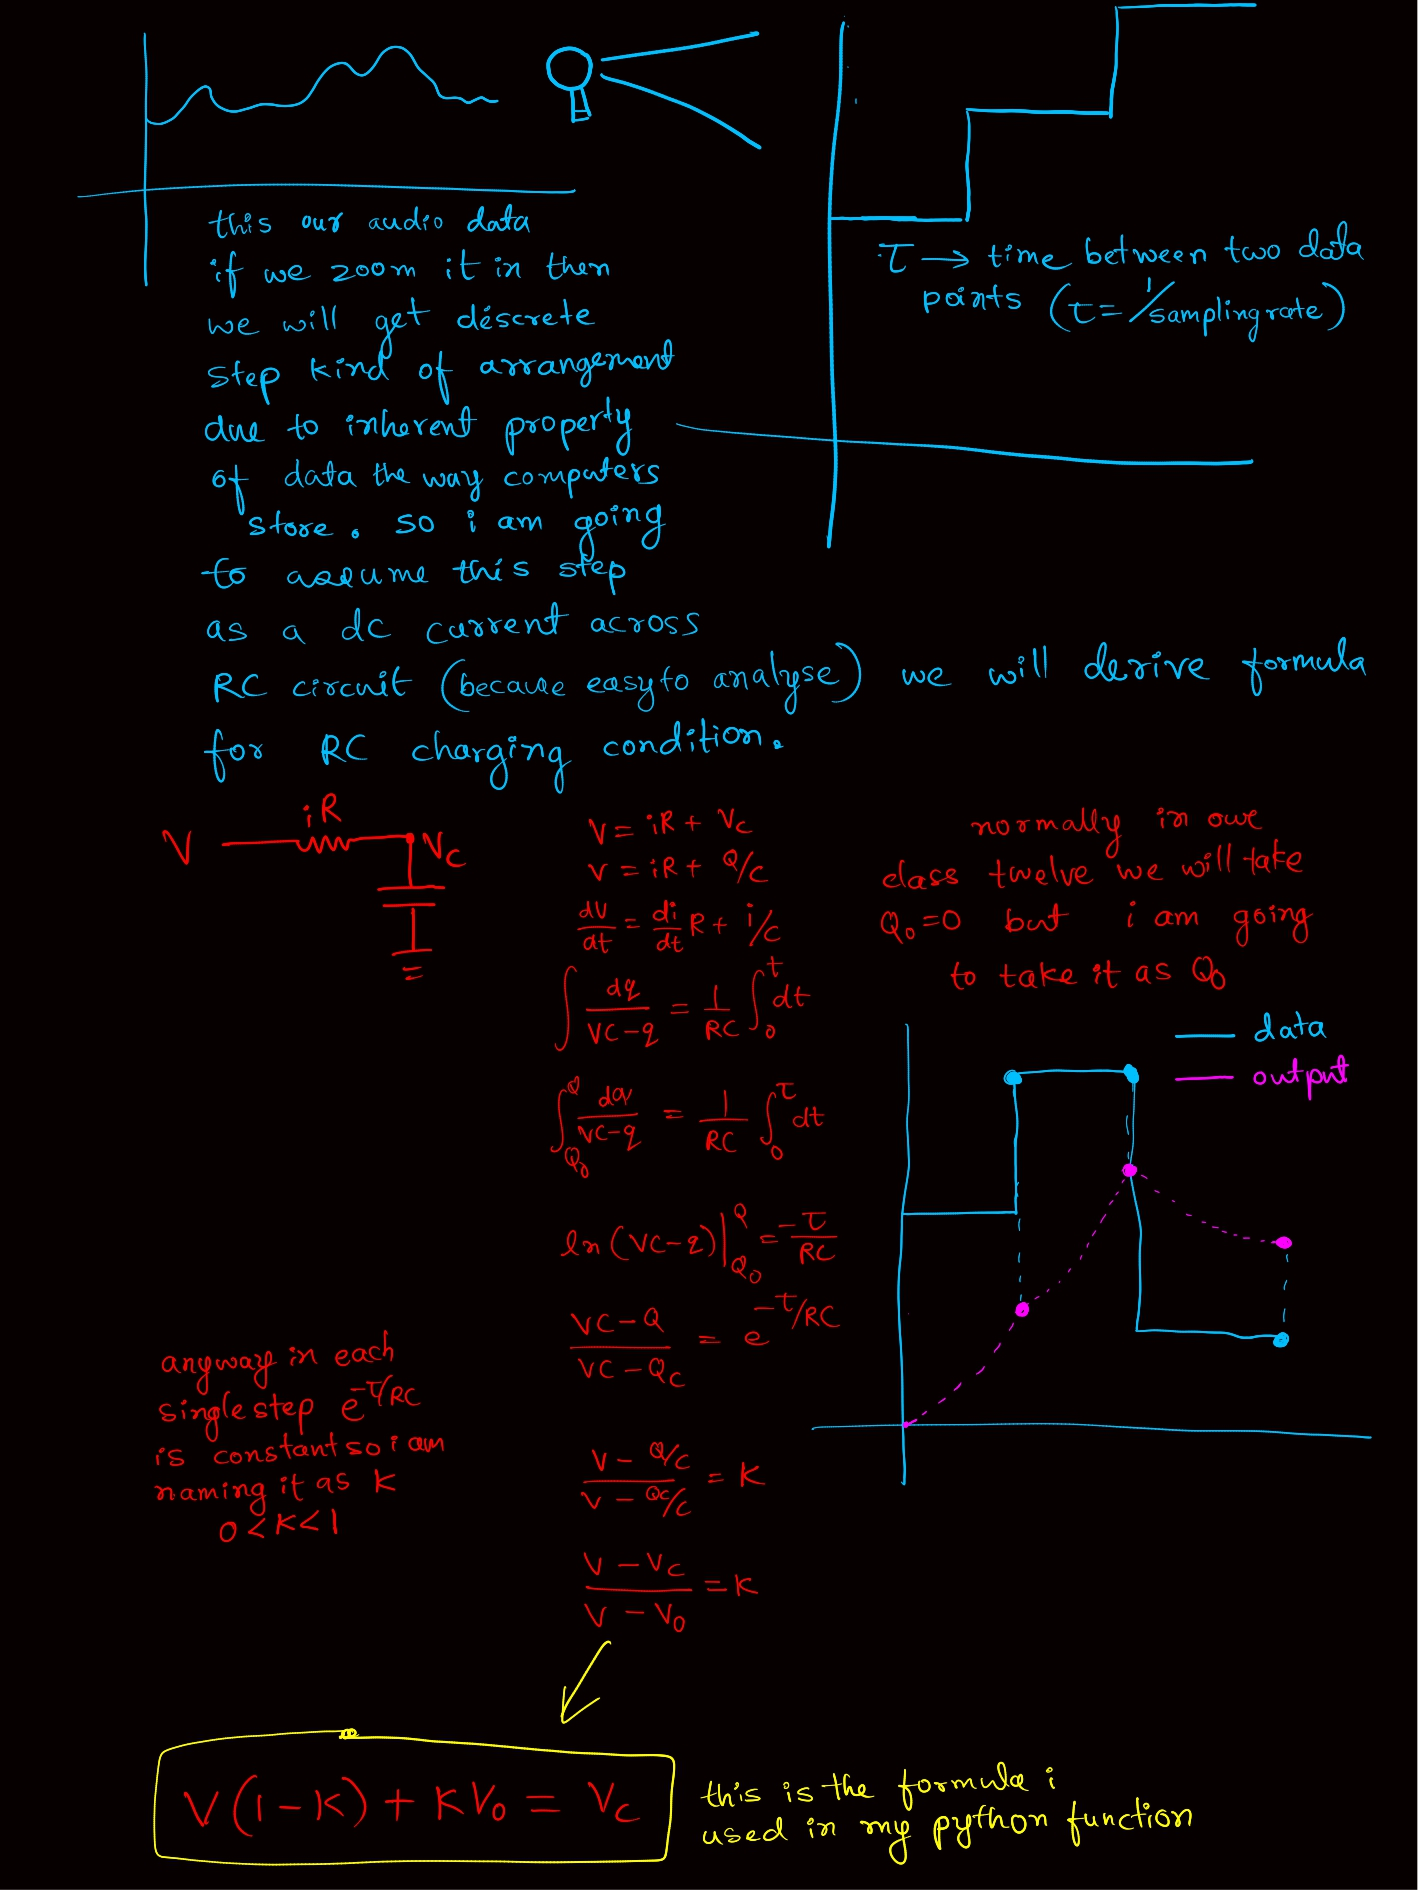

importing some nessasary libraries

In [1]:
from audio2numpy import open_audio
import numpy as np
from scipy.io.wavfile import write

loading our test audio to numpy array

In [2]:
source_signal, sampling_rate = open_audio("/home/rudra/Downloads/katy.wav")   
#path of your test audio
processed_signal=np.empty((len(source_signal)+1,2), dtype=float, order='C')                   
#creating a numpy array for our processed audio

defining our capacitor function

In [5]:
def cap (initial_voltage,input_voltage):#i am excluding time duration bcz it is pre determined from sampling rate
    k=0.999
    output_voltage=input_voltage*(1-k)+k*initial_voltage
    return output_voltage

In [6]:
length=len(source_signal)
completion_bar=length/10 #you can ignore this ,it is only for crude status bar
count=0
processed_signal[0][0]=0
processed_signal[0][1]=0

for i in range(length):
    count=count+1
    if (count>completion_bar):#ignore this
        count=0
        print("#",end=' ')
    processed_signal[i+1][0]= cap(processed_signal[i][0],source_signal[i][0])
    processed_signal[i+1][1]= cap(processed_signal[i][1],source_signal[i][1])
    
    
write("processed.wav",sampling_rate,processed_signal)   

# # # # # # # # # 

## eventhough it seems simple algorithm it produced stunning(it is for me as i was not expecting that ) results please use head phones for better responce. you have to keep K value near to 1 for higher base but if you make it one then you will get the value whatever there in the capacitor at beginning stage (i defaulted it to zero) and if you give the value 0 then no filtering happens you will get same data
### still this is in development stage so any valuable suggestion is highly valued and i will add some more features to it in upcomming days and it is only low pass filter so i will build high pass in future and add some visual representation using matplotlib or some reat time application using py game.